In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
 
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [186]:
df_10_10inst = pd.read_csv('C:/PSL_KNN/data_10_frames_10_instances_removed.csv')

df_10_10inst['classes'] = df_10_10inst['videoname'].apply(lambda x: x.split('_')[0])


In [187]:
'''
for i in range(len(df_10_10inst)):
    if (df_10_10inst['n_landmark'][i] in (23,24,25,26,27,28,29,30,31,32)) :
        df_10_10inst.drop([i], axis=0, inplace=True)
'''

"\nfor i in range(len(df_10_10inst)):\n    if (df_10_10inst['n_landmark'][i] in (23,24,25,26,27,28,29,30,31,32)) :\n        df_10_10inst.drop([i], axis=0, inplace=True)\n"

In [188]:
#df_10_10inst.to_csv("data_10_frames_10_instances_removed_with_fingers_1300features.csv")

In [189]:
x_10_10inst = df_10_10inst.groupby('videoname').agg({'coordinate':lambda x: list(x)})
print(pd.unique(df_10_10inst['videoname']))

['aprender_18' 'aprender_27' 'aprender_35' 'aprender_7' 'bien_174'
 'bien_269' 'comer_146' 'comer_164' 'comer_484' 'comer_489' 'comer_743'
 'comer_779' 'comer_86' 'cómo_12' 'cómo_387' 'cómo_90' 'decir_101'
 'decir_276' 'decir_528' 'decir_789' 'dentro_369' 'dentro_457'
 'dentro_692' 'dentro_73' 'ese_100' 'ese_385' 'ese_608' 'ese_638'
 'ese_642' 'ese_697' 'fuerte_153' 'pensar_339' 'pensar_66' 'pensar_761'
 'pensar_771' 'tú_277' 'tú_639' 'tú_778']


In [190]:
temp_10_10inst = pd.DataFrame(x_10_10inst['coordinate'].tolist())
temp_10_10inst.insert(0,"instance",['aprender_18','aprender_27','aprender_35','aprender_7','bien_174',
 'bien_269','comer_146','comer_164','comer_484','comer_489','comer_743',
 'comer_779','comer_86','cómo_12','cómo_387','cómo_90','decir_101',
 'decir_276','decir_528','decir_789','dentro_369','dentro_457',
 'dentro_692','dentro_73','ese_100','ese_385','ese_608','ese_638',
 'ese_642','ese_697','fuerte_153','pensar_339','pensar_66','pensar_761',
 'pensar_771','tú_277','tú_639','tú_778'],True)


temp_10_10inst['classes'] = temp_10_10inst['instance'].apply(lambda x: x.split('_')[0])


In [191]:
temp_10_10inst

temp_10_10inst_w1 = temp_10_10inst[~temp_10_10inst.classes.str.startswith('bien')]
temp_10_10inst_w2 = temp_10_10inst_w1[~temp_10_10inst_w1.classes.str.startswith('cómo')]
temp_10_10inst_w3 = temp_10_10inst_w2[~temp_10_10inst_w2.classes.str.startswith('dentro')]
temp_10_10inst_w4 = temp_10_10inst_w3[~temp_10_10inst_w3.classes.str.startswith('ese')]
temp_10_10inst_w5 = temp_10_10inst_w4[~temp_10_10inst_w4.classes.str.startswith('fuerte')]
temp_10_10inst_w6 = temp_10_10inst_w5[~temp_10_10inst_w5.classes.str.startswith('tú')]

In [192]:
temp_10_10inst

,instance,0,1,2,3,4,5,6,7,8,...,1491,1492,1493,1494,1495,1496,1497,1498,1499,classes
0,aprender_18,0.514383,0.548351,0.566327,0.582206,0.492199,0.473182,0.458070,0.605817,0.432215,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,aprender
1,aprender_27,0.503314,0.525787,0.540517,0.552647,0.479308,0.461066,0.442991,0.578205,0.415670,...,0.229558,0.271873,0.260261,0.248606,0.257307,0.300118,0.284696,0.269780,0.271916,aprender
2,aprender_35,0.469856,0.492260,0.508573,0.525647,0.448011,0.437482,0.425903,0.561330,0.415927,...,0.547010,0.554929,0.565804,0.574465,0.582370,0.572662,0.582474,0.591038,0.599251,aprender
3,aprender_7,0.516629,0.533556,0.545480,0.558149,0.498532,0.482805,0.466799,0.570888,0.430847,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,aprender
4,bien_174,0.503843,0.535313,0.549920,0.566584,0.500478,0.490255,0.481394,0.610536,0.490198,...,0.635449,0.655707,0.660179,0.657015,0.651047,0.665254,0.672792,0.671988,0.666939,bien
5,bien_269,0.476620,0.507780,0.523758,0.536716,0.452354,0.434020,0.416554,0.567089,0.394132,...,0.462921,0.486823,0.475944,0.483760,0.489095,0.514099,0.503772,0.509562,0.514395,bien
6,comer_146,0.463476,0.506038,0.525913,0.545486,0.458052,0.444824,0.433577,0.583750,0.436373,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,comer
7,comer_164,0.495108,0.525966,0.539569,0.553492,0.470030,0.451660,0.435424,0.583933,0.416120,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,comer
8,comer_484,0.487943,0.516029,0.534687,0.550752,0.459205,0.439914,0.426031,0.574458,0.397154,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,comer
9,comer_489,0.482682,0.510423,0.529385,0.545311,0.456108,0.439849,0.424877,0.575783,0.409630,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,comer


In [193]:
# NUmber of instances
temp_10_10inst_w6['instance'].nunique()

19

In [194]:
# NUmber of classes
temp_10_10inst_w6['classes'].nunique()

4

In [195]:
temp_10_10inst_w6.head()

,instance,0,1,2,3,4,5,6,7,8,...,1491,1492,1493,1494,1495,1496,1497,1498,1499,classes
0,aprender_18,0.514383,0.548351,0.566327,0.582206,0.492199,0.473182,0.458070,0.605817,0.432215,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,aprender
1,aprender_27,0.503314,0.525787,0.540517,0.552647,0.479308,0.461066,0.442991,0.578205,0.415670,...,0.229558,0.271873,0.260261,0.248606,0.257307,0.300118,0.284696,0.269780,0.271916,aprender
2,aprender_35,0.469856,0.492260,0.508573,0.525647,0.448011,0.437482,0.425903,0.561330,0.415927,...,0.547010,0.554929,0.565804,0.574465,0.582370,0.572662,0.582474,0.591038,0.599251,aprender
3,aprender_7,0.516629,0.533556,0.545480,0.558149,0.498532,0.482805,0.466799,0.570888,0.430847,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,aprender
6,comer_146,0.463476,0.506038,0.525913,0.545486,0.458052,0.444824,0.433577,0.583750,0.436373,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,comer


In [196]:
verbs_dataset_10_10inst = temp_10_10inst_w6.iloc[:,1:1302]

In [197]:
new_verbs_dataset_10_10inst = temp_10_10inst_w6.iloc[:,1:1301]

In [198]:
verbs_dataset_10_10inst = verbs_dataset_10_10inst.T.iloc[:1300,:]

In [199]:
verbs_dataset_10_10inst.head()

,0,1,2,3,6,7,8,9,10,11,12,16,17,18,19,31,32,33,34
0,0.514383,0.503314,0.469856,0.516629,0.463476,0.495108,0.487943,0.482682,0.488396,0.462749,0.484583,0.488151,0.526713,0.497506,0.487226,0.486937,0.470199,0.485829,0.493952
1,0.548351,0.525787,0.492260,0.533556,0.506038,0.525966,0.516029,0.510423,0.526052,0.499967,0.519755,0.522648,0.550548,0.529628,0.515773,0.503088,0.493956,0.510850,0.524080
2,0.566327,0.540517,0.508573,0.545480,0.525913,0.539569,0.534687,0.529385,0.543511,0.522404,0.538341,0.543777,0.566960,0.546189,0.535469,0.519589,0.512182,0.528406,0.543434
3,0.582206,0.552647,0.525647,0.558149,0.545486,0.553492,0.550752,0.545311,0.563187,0.540114,0.553681,0.562837,0.582805,0.561635,0.551110,0.534885,0.530087,0.545949,0.562762
4,0.492199,0.479308,0.448011,0.498532,0.458052,0.470030,0.459205,0.456108,0.480875,0.448970,0.465997,0.467079,0.500622,0.472758,0.459482,0.453108,0.439923,0.456175,0.467776


In [200]:
verbs_dataset_10_10inst.columns = ['aprender_18','aprender_27','aprender_35','aprender_7','comer_146','comer_164','comer_484','comer_489','comer_743',
 'comer_779','comer_86','decir_101',
 'decir_276','decir_528','decir_789','pensar_339','pensar_66','pensar_761',
 'pensar_771']

In [201]:
verbs_dataset_10_10inst_features = ['feature_0','feature_1','feature_2','feature_3','feature_4','feature_5','feature_6','feature_7','feature_8','feature_9','feature_10','feature_11','feature_12','feature_13','feature_14','feature_15','feature_16','feature_17','feature_18','feature_19','feature_20','feature_21','feature_22','feature_23','feature_24','feature_25','feature_26','feature_27','feature_28','feature_29','feature_30','feature_31','feature_32','feature_33','feature_34','feature_35','feature_36','feature_37','feature_38','feature_39','feature_40','feature_41','feature_42','feature_43','feature_44','feature_45','feature_46','feature_47','feature_48','feature_49','feature_50','feature_51','feature_52','feature_53','feature_54','feature_55','feature_56','feature_57','feature_58','feature_59','feature_60','feature_61','feature_62','feature_63','feature_64','feature_65','feature_66','feature_67','feature_68','feature_69','feature_70','feature_71','feature_72','feature_73','feature_74','feature_75','feature_76','feature_77','feature_78','feature_79','feature_80','feature_81','feature_82','feature_83','feature_84','feature_85','feature_86','feature_87','feature_88','feature_89','feature_90','feature_91','feature_92','feature_93','feature_94','feature_95','feature_96','feature_97','feature_98','feature_99','feature_100','feature_101','feature_102','feature_103','feature_104','feature_105','feature_106','feature_107','feature_108','feature_109','feature_110','feature_111','feature_112','feature_113','feature_114','feature_115','feature_116','feature_117','feature_118','feature_119','feature_120','feature_121','feature_122','feature_123','feature_124','feature_125','feature_126','feature_127','feature_128','feature_129','feature_130','feature_131','feature_132','feature_133','feature_134','feature_135','feature_136','feature_137','feature_138','feature_139','feature_140','feature_141','feature_142','feature_143','feature_144','feature_145','feature_146','feature_147','feature_148','feature_149','feature_150','feature_151','feature_152','feature_153','feature_154','feature_155','feature_156','feature_157','feature_158','feature_159','feature_160','feature_161','feature_162','feature_163','feature_164','feature_165','feature_166','feature_167','feature_168','feature_169','feature_170','feature_171','feature_172','feature_173','feature_174','feature_175','feature_176','feature_177','feature_178','feature_179','feature_180','feature_181','feature_182','feature_183','feature_184','feature_185','feature_186','feature_187','feature_188','feature_189','feature_190','feature_191','feature_192','feature_193','feature_194','feature_195','feature_196','feature_197','feature_198','feature_199','feature_200','feature_201','feature_202','feature_203','feature_204','feature_205','feature_206','feature_207','feature_208','feature_209','feature_210','feature_211','feature_212','feature_213','feature_214','feature_215','feature_216','feature_217','feature_218','feature_219','feature_220','feature_221','feature_222','feature_223','feature_224','feature_225','feature_226','feature_227','feature_228','feature_229','feature_230','feature_231','feature_232','feature_233','feature_234','feature_235','feature_236','feature_237','feature_238','feature_239','feature_240','feature_241','feature_242','feature_243','feature_244','feature_245','feature_246','feature_247','feature_248','feature_249','feature_250','feature_251','feature_252','feature_253','feature_254','feature_255','feature_256','feature_257','feature_258','feature_259','feature_260','feature_261','feature_262','feature_263','feature_264','feature_265','feature_266','feature_267','feature_268','feature_269','feature_270','feature_271','feature_272','feature_273','feature_274','feature_275','feature_276','feature_277','feature_278','feature_279','feature_280','feature_281','feature_282','feature_283','feature_284','feature_285','feature_286','feature_287','feature_288','feature_289','feature_290','feature_291','feature_292','feature_293','feature_294','feature_295','feature_296','feature_297','feature_298','feature_299','feature_300','feature_301','feature_302','feature_303','feature_304','feature_305','feature_306','feature_307','feature_308','feature_309','feature_310','feature_311','feature_312','feature_313','feature_314','feature_315','feature_316','feature_317','feature_318','feature_319','feature_320','feature_321','feature_322','feature_323','feature_324','feature_325','feature_326','feature_327','feature_328','feature_329','feature_330','feature_331','feature_332','feature_333','feature_334','feature_335','feature_336','feature_337','feature_338','feature_339','feature_340','feature_341','feature_342','feature_343','feature_344','feature_345','feature_346','feature_347','feature_348','feature_349','feature_350','feature_351','feature_352','feature_353','feature_354','feature_355','feature_356','feature_357','feature_358','feature_359','feature_360','feature_361','feature_362','feature_363','feature_364','feature_365','feature_366','feature_367','feature_368','feature_369','feature_370','feature_371','feature_372','feature_373','feature_374','feature_375','feature_376','feature_377','feature_378','feature_379','feature_380','feature_381','feature_382','feature_383','feature_384','feature_385','feature_386','feature_387','feature_388','feature_389','feature_390','feature_391','feature_392','feature_393','feature_394','feature_395','feature_396','feature_397','feature_398','feature_399','feature_400','feature_401','feature_402','feature_403','feature_404','feature_405','feature_406','feature_407','feature_408','feature_409','feature_410','feature_411','feature_412','feature_413','feature_414','feature_415','feature_416','feature_417','feature_418','feature_419','feature_420','feature_421','feature_422','feature_423','feature_424','feature_425','feature_426','feature_427','feature_428','feature_429','feature_430','feature_431','feature_432','feature_433','feature_434','feature_435','feature_436','feature_437','feature_438','feature_439','feature_440','feature_441','feature_442','feature_443','feature_444','feature_445','feature_446','feature_447','feature_448','feature_449','feature_450','feature_451','feature_452','feature_453','feature_454','feature_455','feature_456','feature_457','feature_458', 'feature_459', 'feature_460','feature_461','feature_462','feature_463','feature_464','feature_465','feature_466','feature_467','feature_468','feature_469','feature_470','feature_471','feature_472','feature_473','feature_474','feature_475','feature_476','feature_477','feature_478','feature_479','feature_480','feature_481','feature_482','feature_483','feature_484','feature_485','feature_486','feature_487','feature_488','feature_489','feature_490','feature_491','feature_492','feature_493','feature_494','feature_495','feature_496','feature_497','feature_498','feature_499','feature_500','feature_501','feature_502','feature_503','feature_504','feature_505','feature_506','feature_507','feature_508','feature_509','feature_510','feature_511','feature_512','feature_513','feature_514','feature_515','feature_516','feature_517','feature_518','feature_519','feature_520','feature_521','feature_522','feature_523','feature_524','feature_525','feature_526','feature_527','feature_528','feature_529','feature_530','feature_531','feature_532','feature_533','feature_534','feature_535','feature_536','feature_537','feature_538','feature_539','feature_540','feature_541','feature_542','feature_543','feature_544','feature_545','feature_546','feature_547','feature_548','feature_549','feature_550','feature_551','feature_552','feature_553','feature_554','feature_555','feature_556','feature_557','feature_558','feature_559','feature_560','feature_561','feature_562','feature_563','feature_564','feature_565','feature_566','feature_567','feature_568','feature_569','feature_570','feature_571','feature_572','feature_573','feature_574','feature_575','feature_576','feature_577','feature_578','feature_579','feature_580','feature_581','feature_582','feature_583','feature_584','feature_585','feature_586','feature_587','feature_588','feature_589','feature_590','feature_591','feature_592','feature_593','feature_594','feature_595','feature_596','feature_597','feature_598','feature_599','feature_600','feature_601','feature_602','feature_603','feature_604','feature_605','feature_606','feature_607','feature_608','feature_609','feature_610','feature_611','feature_612','feature_613','feature_614','feature_615','feature_616','feature_617','feature_618','feature_619','feature_620','feature_621','feature_622','feature_623','feature_624','feature_625','feature_626','feature_627','feature_628','feature_629','feature_630','feature_631','feature_632','feature_633','feature_634','feature_635','feature_636','feature_637','feature_638','feature_639','feature_640','feature_641','feature_642','feature_643','feature_644','feature_645','feature_646','feature_647','feature_648','feature_649','feature_650','feature_651','feature_652','feature_653','feature_654','feature_655','feature_656','feature_657','feature_658','feature_659','feature_660','feature_661','feature_662','feature_663','feature_664','feature_665','feature_666','feature_667','feature_668','feature_669','feature_670','feature_671','feature_672','feature_673','feature_674','feature_675','feature_676','feature_677','feature_678','feature_679','feature_680','feature_681','feature_682','feature_683','feature_684','feature_685','feature_686','feature_687','feature_688','feature_689','feature_690','feature_691','feature_692','feature_693','feature_694','feature_695','feature_696','feature_697','feature_698','feature_699','feature_700','feature_701','feature_702','feature_703','feature_704','feature_705','feature_706','feature_707','feature_708','feature_709','feature_710','feature_711','feature_712','feature_713','feature_714','feature_715','feature_716','feature_717','feature_718',
'feature_719','feature_720','feature_721','feature_722','feature_723','feature_724','feature_725','feature_726','feature_727','feature_728','feature_729','feature_730','feature_731','feature_732','feature_733','feature_734','feature_735','feature_736','feature_737','feature_738','feature_739','feature_740','feature_741','feature_742','feature_743','feature_744','feature_745','feature_746','feature_747','feature_748','feature_749','feature_750','feature_751','feature_752','feature_753','feature_754','feature_755','feature_756','feature_757','feature_758','feature_759','feature_760','feature_761','feature_762','feature_763','feature_764','feature_765','feature_766','feature_767','feature_768','feature_769','feature_770','feature_771','feature_772','feature_773','feature_774','feature_775','feature_776','feature_777','feature_778','feature_779','feature_780','feature_781','feature_782','feature_783','feature_784','feature_785','feature_786','feature_787','feature_788','feature_789','feature_790','feature_791','feature_792','feature_793','feature_794','feature_795','feature_796','feature_797','feature_798','feature_799','feature_800','feature_801','feature_802','feature_803','feature_804','feature_805','feature_806','feature_807','feature_808','feature_809','feature_810','feature_811','feature_812','feature_813','feature_814','feature_815','feature_816','feature_817','feature_818','feature_819','feature_820','feature_821','feature_822','feature_823','feature_824','feature_825','feature_826','feature_827','feature_828','feature_829','feature_830','feature_831','feature_832','feature_833','feature_834','feature_835','feature_836','feature_837','feature_838','feature_839','feature_840','feature_841','feature_842','feature_843','feature_844','feature_845','feature_846','feature_847','feature_848','feature_849','feature_850','feature_851','feature_852','feature_853','feature_854','feature_855','feature_856','feature_857','feature_858','feature_859','feature_860','feature_861','feature_862','feature_863','feature_864','feature_865','feature_866','feature_867','feature_868','feature_869','feature_870','feature_871','feature_872','feature_873','feature_874','feature_875','feature_876','feature_877','feature_878','feature_879','feature_880','feature_881','feature_882','feature_883','feature_884','feature_885','feature_886','feature_887','feature_888','feature_889','feature_890','feature_891','feature_892','feature_893','feature_894','feature_895','feature_896','feature_897','feature_898','feature_899','feature_900','feature_901','feature_902','feature_903','feature_904','feature_905','feature_906','feature_907','feature_908','feature_909','feature_910','feature_911','feature_912','feature_913','feature_914','feature_915','feature_916','feature_917','feature_918','feature_919','feature_920','feature_921','feature_922','feature_923','feature_924','feature_925','feature_926','feature_927','feature_928','feature_929','feature_930','feature_931','feature_932','feature_933','feature_934','feature_935','feature_936','feature_937','feature_938','feature_939','feature_940','feature_941','feature_942','feature_943','feature_944','feature_945','feature_946','feature_947','feature_948','feature_949','feature_950','feature_951','feature_952','feature_953','feature_954','feature_955','feature_956','feature_957','feature_958','feature_959','feature_960','feature_961','feature_962','feature_963','feature_964','feature_965','feature_966','feature_967','feature_968','feature_969','feature_970','feature_971','feature_972','feature_973','feature_974','feature_975','feature_976','feature_977','feature_978','feature_979','feature_980','feature_981','feature_982','feature_983','feature_984','feature_985','feature_986','feature_987','feature_988','feature_989','feature_990','feature_991','feature_992','feature_993','feature_994','feature_995','feature_996','feature_997','feature_998','feature_999','feature_1000','feature_1001','feature_1002','feature_1003','feature_1004','feature_1005','feature_1006','feature_1007','feature_1008','feature_1009','feature_1010','feature_1011','feature_1012','feature_1013','feature_1014','feature_1015','feature_1016','feature_1017','feature_1018','feature_1019','feature_1020','feature_1021','feature_1022','feature_1023','feature_1024','feature_1025','feature_1026','feature_1027','feature_1028','feature_1029','feature_1030','feature_1031','feature_1032','feature_1033','feature_1034','feature_1035','feature_1036','feature_1037','feature_1038','feature_1039','feature_1040','feature_1041','feature_1042','feature_1043','feature_1044','feature_1045','feature_1046','feature_1047','feature_1048','feature_1049','feature_1050','feature_1051','feature_1052','feature_1053','feature_1054','feature_1055','feature_1056','feature_1057','feature_1058','feature_1059','feature_1060','feature_1061','feature_1062','feature_1063','feature_1064','feature_1065','feature_1066','feature_1067','feature_1068','feature_1069','feature_1070','feature_1071','feature_1072','feature_1073','feature_1074','feature_1075','feature_1076','feature_1077','feature_1078','feature_1079','feature_1080','feature_1081','feature_1082','feature_1083','feature_1084','feature_1085','feature_1086','feature_1087','feature_1088','feature_1089','feature_1090','feature_1091','feature_1092','feature_1093','feature_1094','feature_1095','feature_1096','feature_1097','feature_1098','feature_1099','feature_1100','feature_1101','feature_1102','feature_1103','feature_1104','feature_1105','feature_1106','feature_1107','feature_1108','feature_1109','feature_1110','feature_1111','feature_1112','feature_1113','feature_1114','feature_1115','feature_1116','feature_1117','feature_1118','feature_1119','feature_1120','feature_1121','feature_1122','feature_1123','feature_1124','feature_1125','feature_1126','feature_1127','feature_1128','feature_1129','feature_1130','feature_1131','feature_1132','feature_1133','feature_1134','feature_1135','feature_1136','feature_1137','feature_1138','feature_1139','feature_1140','feature_1141','feature_1142','feature_1143','feature_1144','feature_1145','feature_1146','feature_1147','feature_1148','feature_1149','feature_1150','feature_1151','feature_1152','feature_1153','feature_1154','feature_1155','feature_1156','feature_1157','feature_1158','feature_1159','feature_1160','feature_1161','feature_1162','feature_1163','feature_1164','feature_1165','feature_1166','feature_1167','feature_1168','feature_1169','feature_1170','feature_1171','feature_1172','feature_1173','feature_1174','feature_1175','feature_1176','feature_1177','feature_1178','feature_1179','feature_1180','feature_1181','feature_1182','feature_1183','feature_1184','feature_1185','feature_1186','feature_1187','feature_1188','feature_1189','feature_1190','feature_1191','feature_1192','feature_1193','feature_1194','feature_1195','feature_1196','feature_1197','feature_1198','feature_1199','feature_1200','feature_1201','feature_1202','feature_1203','feature_1204','feature_1205','feature_1206','feature_1207','feature_1208','feature_1209','feature_1210','feature_1211','feature_1212','feature_1213','feature_1214','feature_1215','feature_1216','feature_1217','feature_1218','feature_1219','feature_1220','feature_1221','feature_1222','feature_1223','feature_1224','feature_1225','feature_1226','feature_1227','feature_1228','feature_1229','feature_1230','feature_1231','feature_1232','feature_1233','feature_1234','feature_1235','feature_1236','feature_1237','feature_1238','feature_1239','feature_1240','feature_1241','feature_1242','feature_1243','feature_1244','feature_1245','feature_1246','feature_1247','feature_1248','feature_1249','feature_1250','feature_1251','feature_1252','feature_1253','feature_1254','feature_1255','feature_1256','feature_1257','feature_1258','feature_1259','feature_1260','feature_1261','feature_1262','feature_1263','feature_1264','feature_1265','feature_1266','feature_1267','feature_1268','feature_1269','feature_1270','feature_1271','feature_1272','feature_1273','feature_1274','feature_1275','feature_1276','feature_1277','feature_1278','feature_1279','feature_1280','feature_1281','feature_1282','feature_1283','feature_1284','feature_1285','feature_1286','feature_1287','feature_1288','feature_1289','feature_1290','feature_1291','feature_1292','feature_1293','feature_1294','feature_1295','feature_1296','feature_1297','feature_1298','feature_1299'



]

In [202]:
verbs_dataset_10_10inst['features'] = verbs_dataset_10_10inst_features

verbs_dataset_10_10inst.set_index('features',inplace = True)

In [203]:
verbs_dataset_10_10inst.head()

,aprender_18,aprender_27,aprender_35,aprender_7,comer_146,comer_164,comer_484,comer_489,comer_743,comer_779,comer_86,decir_101,decir_276,decir_528,decir_789,pensar_339,pensar_66,pensar_761,pensar_771
features,,,,,,,,,,,,,,,,,,,
feature_0,0.514383,0.503314,0.469856,0.516629,0.463476,0.495108,0.487943,0.482682,0.488396,0.462749,0.484583,0.488151,0.526713,0.497506,0.487226,0.486937,0.470199,0.485829,0.493952
feature_1,0.548351,0.525787,0.492260,0.533556,0.506038,0.525966,0.516029,0.510423,0.526052,0.499967,0.519755,0.522648,0.550548,0.529628,0.515773,0.503088,0.493956,0.510850,0.524080
feature_2,0.566327,0.540517,0.508573,0.545480,0.525913,0.539569,0.534687,0.529385,0.543511,0.522404,0.538341,0.543777,0.566960,0.546189,0.535469,0.519589,0.512182,0.528406,0.543434
feature_3,0.582206,0.552647,0.525647,0.558149,0.545486,0.553492,0.550752,0.545311,0.563187,0.540114,0.553681,0.562837,0.582805,0.561635,0.551110,0.534885,0.530087,0.545949,0.562762
feature_4,0.492199,0.479308,0.448011,0.498532,0.458052,0.470030,0.459205,0.456108,0.480875,0.448970,0.465997,0.467079,0.500622,0.472758,0.459482,0.453108,0.439923,0.456175,0.467776


In [204]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA

# sklearn center and scale the data, so that the means for each gene (instance) are 0 and the standard deviations for each gene are 1
scaled_data_verbs = preprocessing.scale(verbs_dataset_10_10inst.T)

In [205]:
pca_verbs = PCA()
pca_verbs.fit(scaled_data_verbs)
pca_data_verbs = pca_verbs.transform(scaled_data_verbs)

In [206]:
per_var_verbs = np.round(pca_verbs.explained_variance_ratio_* 100 , decimals = 1)
labels_verbs = ['PC' + str(x) for x in range(1 , len(per_var_verbs) +1)]

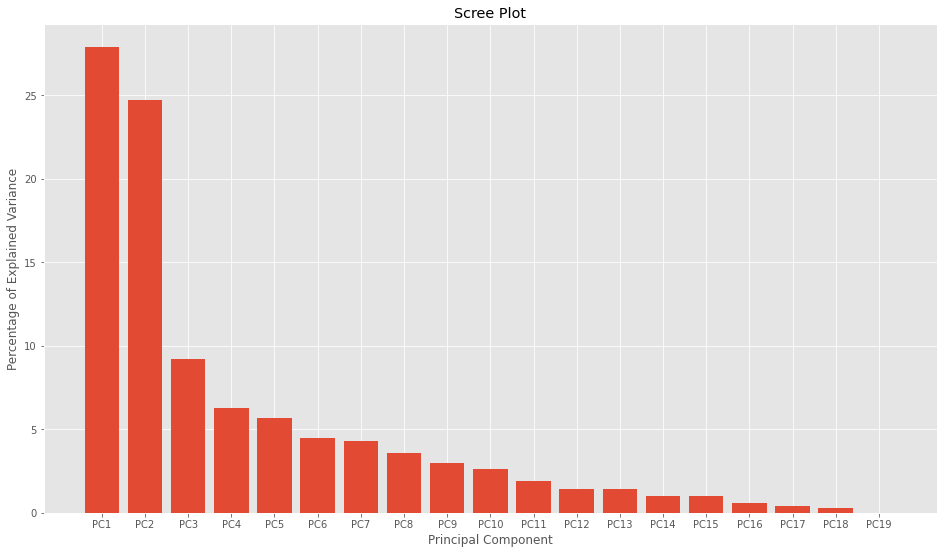

In [207]:
plt.bar(x=range(1, len(per_var_verbs) + 1 ), height = per_var_verbs, tick_label = labels_verbs)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [208]:

#Ojo, se cambió de posición (transposición), por eso pareciera que ambos (index y columns) llevaran lo mismo pero NO. El index lleva las instancias.
pca_df_verbs_verbs = pd.DataFrame(pca_data_verbs, index = verbs_dataset_10_10inst.columns , columns = labels_verbs)

In [209]:
# Loading scores for PC1

loading_scores_verbs  = pd.Series(pca_verbs.components_[0], index = verbs_dataset_10_10inst_features)
sorted_loading_scores_verbs = loading_scores_verbs.abs().sort_values(ascending = False)

top_10_instances_verbs = sorted_loading_scores_verbs[0:10].index.values

PC1_loading_scores_verbs = loading_scores_verbs[top_10_instances_verbs]

PC1_df_verbs = PC1_loading_scores_verbs.to_frame()
PC1_df_verbs = PC1_df_verbs.rename(columns={0: 'Col_1'})
PC1_df_verbs.reset_index(level=0, inplace=True)


# Loading scores for PC2


loading_scores_verbs  = pd.Series(pca_verbs.components_[1], index = verbs_dataset_10_10inst_features)
sorted_loading_scores_verbs = loading_scores_verbs.abs().sort_values(ascending = False)

top_10_instances_verbs = sorted_loading_scores_verbs[0:10].index.values

PC2_loading_scores_verbs = loading_scores_verbs[top_10_instances_verbs]

PC2_df_verbs = PC2_loading_scores_verbs.to_frame()
PC2_df_verbs = PC2_df_verbs.rename(columns={0: 'Col_1'})
PC2_df_verbs.reset_index(level=0, inplace=True)

# Loading scores for PC3


loading_scores_verbs  = pd.Series(pca_verbs.components_[2], index = verbs_dataset_10_10inst_features)
sorted_loading_scores_verbs = loading_scores_verbs.abs().sort_values(ascending = False)

top_10_instances_verbs = sorted_loading_scores_verbs[0:10].index.values

PC3_loading_scores_verbs = loading_scores_verbs[top_10_instances_verbs]

##############

PC3_df_verbs = PC3_loading_scores_verbs.to_frame()
PC3_df_verbs = PC3_df_verbs.rename(columns={0: 'Col_1'})
PC3_df_verbs.reset_index(level=0, inplace=True)


# Loading scores for PC4


loading_scores_verbs  = pd.Series(pca_verbs.components_[3], index = verbs_dataset_10_10inst_features)
sorted_loading_scores_verbs = loading_scores_verbs.abs().sort_values(ascending = False)

top_10_instances_verbs = sorted_loading_scores_verbs[0:10].index.values

PC4_loading_scores_verbs = loading_scores_verbs[top_10_instances_verbs]

##############

PC4_df_verbs = PC4_loading_scores_verbs.to_frame()
PC4_df_verbs = PC4_df_verbs.rename(columns={0: 'Col_1'})
PC4_df_verbs.reset_index(level=0, inplace=True)

# Loading scores for PC5


loading_scores_verbs  = pd.Series(pca_verbs.components_[4], index = verbs_dataset_10_10inst_features)
sorted_loading_scores_verbs = loading_scores_verbs.abs().sort_values(ascending = False)

top_10_instances_verbs = sorted_loading_scores_verbs[0:10].index.values

PC5_loading_scores_verbs = loading_scores_verbs[top_10_instances_verbs]

PC5_df_verbs = PC5_loading_scores_verbs.to_frame()
PC5_df_verbs = PC5_df_verbs.rename(columns={0: 'Col_1'})
PC5_df_verbs.reset_index(level=0, inplace=True)

# Loading scores for PC6

loading_scores_verbs  = pd.Series(pca_verbs.components_[5], index = verbs_dataset_10_10inst_features)
sorted_loading_scores_verbs = loading_scores_verbs.abs().sort_values(ascending = False)

top_10_instances_verbs = sorted_loading_scores_verbs[0:10].index.values

PC6_loading_scores_verbs = loading_scores_verbs[top_10_instances_verbs]

PC6_df_verbs = PC6_loading_scores_verbs.to_frame()
PC6_df_verbs = PC6_df_verbs.rename(columns={0: 'Col_1'})
PC6_df_verbs.reset_index(level=0, inplace=True)

# Loading scores for PC7

loading_scores_verbs  = pd.Series(pca_verbs.components_[6], index = verbs_dataset_10_10inst_features)
sorted_loading_scores_verbs = loading_scores_verbs.abs().sort_values(ascending = False)

top_10_instances_verbs = sorted_loading_scores_verbs[0:10].index.values

PC7_loading_scores_verbs = loading_scores_verbs[top_10_instances_verbs]

PC7_df_verbs = PC7_loading_scores_verbs.to_frame()
PC7_df_verbs = PC7_df_verbs.rename(columns={0: 'Col_1'})
PC7_df_verbs.reset_index(level=0, inplace=True)

# Loading scores for PC8


loading_scores_verbs  = pd.Series(pca_verbs.components_[7], index = verbs_dataset_10_10inst_features)
sorted_loading_scores_verbs = loading_scores_verbs.abs().sort_values(ascending = False)
top_10_instances_verbs = sorted_loading_scores_verbs[0:10].index.values

PC8_loading_scores_verbs = loading_scores_verbs[top_10_instances_verbs]

PC8_df_verbs = PC8_loading_scores_verbs.to_frame()
PC8_df_verbs = PC8_df_verbs.rename(columns={0: 'Col_1'})
PC8_df_verbs.reset_index(level=0, inplace=True)

# Loading scores for PC9


loading_scores_verbs  = pd.Series(pca_verbs.components_[8], index = verbs_dataset_10_10inst_features)
sorted_loading_scores_verbs = loading_scores_verbs.abs().sort_values(ascending = False)

top_10_instances_verbs = sorted_loading_scores_verbs[0:10].index.values

PC9_loading_scores_verbs = loading_scores_verbs[top_10_instances_verbs]


PC9_df_verbs = PC9_loading_scores_verbs.to_frame()
PC9_df_verbs = PC9_df_verbs.rename(columns={0: 'Col_1'})
PC9_df_verbs.reset_index(level=0, inplace=True)


# Loading scores for PC10


loading_scores_verbs  = pd.Series(pca_verbs.components_[9], index = verbs_dataset_10_10inst_features)
sorted_loading_scores_verbs = loading_scores_verbs.abs().sort_values(ascending = False)
top_10_instances_verbs = sorted_loading_scores_verbs[0:10].index.values

PC10_loading_scores_verbs = loading_scores_verbs[top_10_instances_verbs]

PC10_df_verbs = PC10_loading_scores_verbs.to_frame()
PC10_df_verbs = PC10_df_verbs.rename(columns={0: 'Col_1'})
PC10_df_verbs.reset_index(level=0, inplace=True)





In [210]:
PCA_10components_verbs = PC1_df_verbs.append(PC2_df_verbs).append(PC3_df_verbs).append(PC4_df_verbs).append(PC5_df_verbs).append(PC6_df_verbs).append(PC7_df_verbs).append(PC8_df_verbs).append(PC9_df_verbs).append(PC10_df_verbs)

dic = {}
for i in range(100):
    x = list(PCA_10components_verbs.iloc[i,:])
    if x[0] not in dic:
        dic[x[0]] = 1
    else:
        dic[x[0]] +=1

dic

C:\Users\BRENDA\AppData\Local\Temp\ipykernel_3132\2986029925.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  PCA_10components_verbs = PC1_df_verbs.append(PC2_df_verbs).append(PC3_df_verbs).append(PC4_df_verbs).append(PC5_df_verbs).append(PC6_df_verbs).append(PC7_df_verbs).append(PC8_df_verbs).append(PC9_df_verbs).append(PC10_df_verbs)
C:\Users\BRENDA\AppData\Local\Temp\ipykernel_3132\2986029925.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  PCA_10components_verbs = PC1_df_verbs.append(PC2_df_verbs).append(PC3_df_verbs).append(PC4_df_verbs).append(PC5_df_verbs).append(PC6_df_verbs).append(PC7_df_verbs).append(PC8_df_verbs).append(PC9_df_verbs).append(PC10_df_verbs)
C:\Users\BRENDA\AppData\Local\Temp\ipykernel_3132\2986029925.py:1: FutureWarning: The frame.append method is deprecated and will be removed 

{'feature_125': 1,
 'feature_126': 1,
 'feature_122': 1,
 'feature_121': 1,
 'feature_127': 1,
 'feature_123': 1,
 'feature_118': 1,
 'feature_117': 1,
 'feature_128': 1,
 'feature_572': 1,
 'feature_780': 1,
 'feature_782': 1,
 'feature_778': 1,
 'feature_775': 1,
 'feature_781': 1,
 'feature_777': 1,
 'feature_762': 1,
 'feature_779': 1,
 'feature_837': 1,
 'feature_776': 1,
 'feature_2': 1,
 'feature_1': 1,
 'feature_3': 1,
 'feature_58': 1,
 'feature_57': 1,
 'feature_56': 1,
 'feature_55': 1,
 'feature_130': 1,
 'feature_131': 1,
 'feature_766': 1,
 'feature_481': 1,
 'feature_556': 1,
 'feature_406': 1,
 'feature_331': 1,
 'feature_552': 1,
 'feature_631': 1,
 'feature_477': 1,
 'feature_105': 1,
 'feature_29': 1,
 'feature_554': 1,
 'feature_956': 1,
 'feature_955': 1,
 'feature_220': 1,
 'feature_224': 1,
 'feature_223': 1,
 'feature_219': 1,
 'feature_957': 1,
 'feature_204': 1,
 'feature_216': 1,
 'feature_959': 1,
 'feature_953': 1,
 'feature_952': 1,
 'feature_949': 1,
 'fe

In [211]:
##############################
  #HOW TO CALCULATE WITH PCA ( 6 components )
#############################

In [212]:
projection_verbs = pca_verbs.transform(X=new_verbs_dataset_10_10inst)
projection_verbs = pd.DataFrame(
    projection_verbs,
    columns =[ 'PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19' ],
    index   = new_verbs_dataset_10_10inst.index
)
projection_verbs.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19
0,8.105615,-13.864074,-6.620327,-2.188155,4.953573,-4.484361,1.547208,7.369802,4.355708,5.128882,-3.105767,3.257483,8.747035,-2.322022,0.180291,1.352953,-1.001459,0.538314,-0.584435
1,4.934860,-14.909857,-5.098570,-3.113846,6.015040,-4.614235,4.718439,8.612639,-0.072410,4.159064,-2.402282,1.422239,9.295031,-1.290554,0.630021,1.840244,-2.116529,-0.212359,-0.459429
2,9.284063,-9.246034,-5.254463,-1.312403,7.386057,-5.528174,1.184930,6.132783,1.556455,3.236905,-1.117181,2.492347,7.066543,-1.551664,-0.254137,1.250849,-1.618299,0.189776,-0.428939
3,7.081202,-7.657921,-3.512520,-3.470569,7.582096,-2.437118,4.986342,6.591800,2.605231,5.365146,-0.613305,2.718853,7.078491,-2.502040,-0.367666,0.188576,-2.146450,0.041213,-0.367943
6,5.801278,-16.103883,-0.360160,-1.520612,8.096032,-3.065472,2.006743,8.975428,3.897977,5.255246,-1.124529,2.854548,7.455615,-0.749871,0.833454,2.077262,-0.801926,0.784126,-0.321349


In [213]:
PC6_10_10inst_verbs = projection_verbs.iloc[:,0:6]
PC6_10_10inst_verbs.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,8.105615,-13.864074,-6.620327,-2.188155,4.953573,-4.484361
1,4.934860,-14.909857,-5.098570,-3.113846,6.015040,-4.614235
2,9.284063,-9.246034,-5.254463,-1.312403,7.386057,-5.528174
3,7.081202,-7.657921,-3.512520,-3.470569,7.582096,-2.437118
6,5.801278,-16.103883,-0.360160,-1.520612,8.096032,-3.065472


In [214]:
PC6_10_10inst_verbs.insert(0,"instance",['aprender_18','aprender_27','aprender_35','aprender_7','comer_146','comer_164','comer_484','comer_489','comer_743',
 'comer_779','comer_86','decir_101',
 'decir_276','decir_528','decir_789','pensar_339','pensar_66','pensar_761',
 'pensar_771'],True)

In [215]:
PC6_10_10inst_verbs['classes'] = PC6_10_10inst_verbs['instance'].apply(lambda x: x.split('_')[0])

C:\Users\BRENDA\AppData\Local\Temp\ipykernel_3132\2089460187.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PC6_10_10inst_verbs['classes'] = PC6_10_10inst_verbs['instance'].apply(lambda x: x.split('_')[0])


In [216]:
PC6_10_10inst_verbs.drop("instance", axis=1, inplace=True)

PC6_10_10inst_verbs.head()

C:\Users\BRENDA\AppData\Local\Temp\ipykernel_3132\3669800412.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PC6_10_10inst_verbs.drop("instance", axis=1, inplace=True)


,PC1,PC2,PC3,PC4,PC5,PC6,classes
0,8.105615,-13.864074,-6.620327,-2.188155,4.953573,-4.484361,aprender
1,4.934860,-14.909857,-5.098570,-3.113846,6.015040,-4.614235,aprender
2,9.284063,-9.246034,-5.254463,-1.312403,7.386057,-5.528174,aprender
3,7.081202,-7.657921,-3.512520,-3.470569,7.582096,-2.437118,aprender
6,5.801278,-16.103883,-0.360160,-1.520612,8.096032,-3.065472,comer


In [217]:
print(pd.unique(PC6_10_10inst_verbs['classes']))

X_PC6_10_10inst_verbs= PC6_10_10inst_verbs.iloc[:,:-1].values
y_PC6_10_10inst_verbs=  PC6_10_10inst_verbs.iloc[:,-1].values

['aprender' 'comer' 'decir' 'pensar']


In [218]:
Labelencoder_Y = LabelEncoder()
y_PC6_10_10inst_verbs== Labelencoder_Y.fit_transform(y_PC6_10_10inst_verbs)
y_PC6_10_10inst_verbs

array(['aprender', 'aprender', 'aprender', 'aprender', 'comer', 'comer',
       'comer', 'comer', 'comer', 'comer', 'comer', 'decir', 'decir',
       'decir', 'decir', 'pensar', 'pensar', 'pensar', 'pensar'],
      dtype=object)

In [219]:
X_train_PC6_10_10inst_verbs, X_test_PC6_10_10inst_verbs, y_train_PC6_10_10inst_verbs, y_test_PC6_10_10inst_verbs = train_test_split(X_PC6_10_10inst_verbs, y_PC6_10_10inst_verbs, test_size = 0.25, random_state=0)
scaler = MinMaxScaler()
X_train_PC6_10_10inst_verbs = scaler.fit_transform(X_train_PC6_10_10inst_verbs)
X_test_PC6_10_10inst_verbs = scaler.transform(X_test_PC6_10_10inst_verbs)

([<matplotlib.axis.XTick at 0x26af29bc3d0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

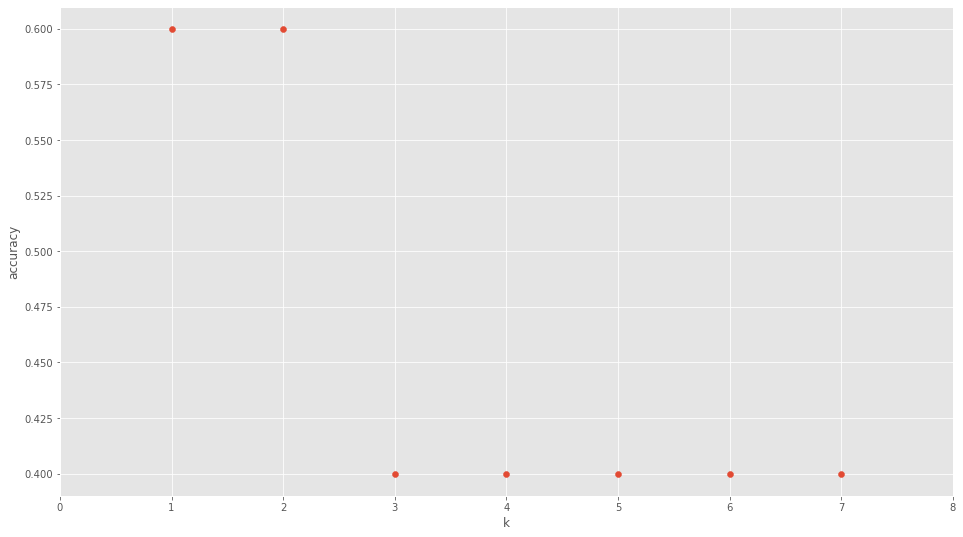

In [220]:
k_range_PC6_10_10inst_verbs = range(1, 8)
scores_PC6_10_10inst_verbs = []
for k in k_range_PC6_10_10inst_verbs:
    knn_PC6_10_10inst_verbs = KNeighborsClassifier(n_neighbors = k)
    knn_PC6_10_10inst_verbs.fit(X_train_PC6_10_10inst_verbs, y_train_PC6_10_10inst_verbs)
    scores_PC6_10_10inst_verbs.append(knn_PC6_10_10inst_verbs.score(X_test_PC6_10_10inst_verbs, y_test_PC6_10_10inst_verbs))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range_PC6_10_10inst_verbs, scores_PC6_10_10inst_verbs)
plt.xticks([0,1,2,3,4,5,6,7,8])

# With k = 1

Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 0.60


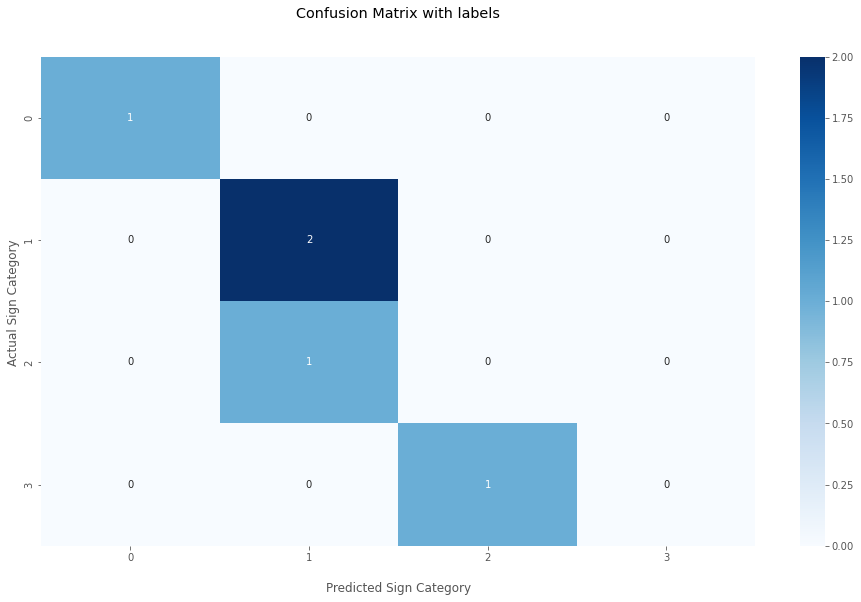

In [221]:
n_neighbors_PC6_10_10inst_verbs = 1
 
knn_PC6_10_10inst_verbs = KNeighborsClassifier(n_neighbors_PC6_10_10inst_verbs)
knn_PC6_10_10inst_verbs.fit(X_train_PC6_10_10inst_verbs, y_train_PC6_10_10inst_verbs)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_PC6_10_10inst_verbs.score(X_train_PC6_10_10inst_verbs, y_train_PC6_10_10inst_verbs)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_PC6_10_10inst_verbs.score(X_test_PC6_10_10inst_verbs, y_test_PC6_10_10inst_verbs)))

pred_PC6_10_10inst_verbs = knn_PC6_10_10inst_verbs.predict(X_test_PC6_10_10inst_verbs)
cf_matrix_PC6_10_10inst_verbs = confusion_matrix(y_test_PC6_10_10inst_verbs, pred_PC6_10_10inst_verbs)

import seaborn as sns
import matplotlib.pyplot as plt

ax_PC6_10_10inst_verbs = sns.heatmap(cf_matrix_PC6_10_10inst_verbs, annot=True, cmap='Blues')

ax_PC6_10_10inst_verbs.set_title('Confusion Matrix with labels\n\n');
ax_PC6_10_10inst_verbs.set_xlabel('\nPredicted Sign Category');
ax_PC6_10_10inst_verbs.set_ylabel('Actual Sign Category ');

## Display the visualization of the Confusion Matrix.
plt.show()

# With k = 2

Accuracy of K-NN classifier on training set: 0.64
Accuracy of K-NN classifier on test set: 0.60


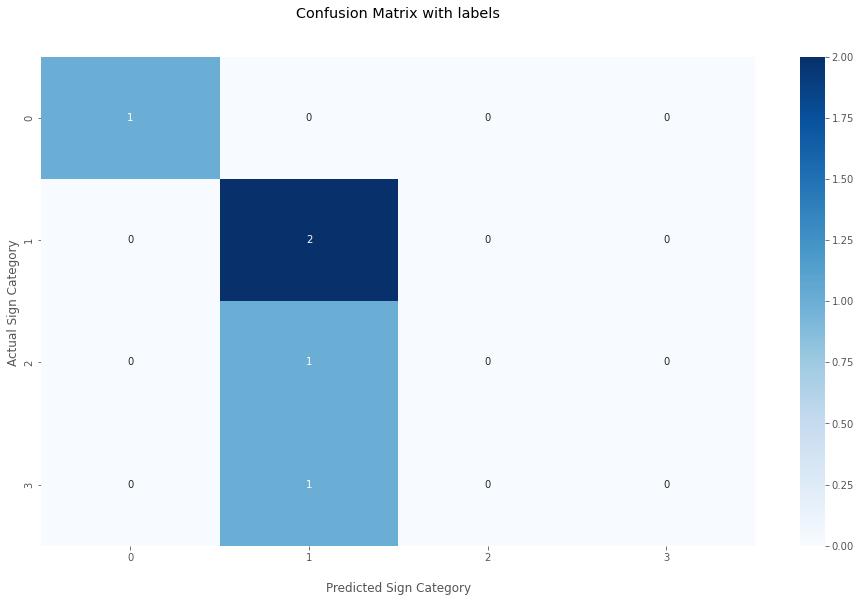

In [222]:
n_neighbors_PC6_10_10inst_verbs = 2
 
knn_PC6_10_10inst_verbs = KNeighborsClassifier(n_neighbors_PC6_10_10inst_verbs)
knn_PC6_10_10inst_verbs.fit(X_train_PC6_10_10inst_verbs, y_train_PC6_10_10inst_verbs)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_PC6_10_10inst_verbs.score(X_train_PC6_10_10inst_verbs, y_train_PC6_10_10inst_verbs)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_PC6_10_10inst_verbs.score(X_test_PC6_10_10inst_verbs, y_test_PC6_10_10inst_verbs)))

pred_PC6_10_10inst_verbs = knn_PC6_10_10inst_verbs.predict(X_test_PC6_10_10inst_verbs)
cf_matrix_PC6_10_10inst_verbs = confusion_matrix(y_test_PC6_10_10inst_verbs, pred_PC6_10_10inst_verbs)

import seaborn as sns
import matplotlib.pyplot as plt

ax_PC6_10_10inst_verbs = sns.heatmap(cf_matrix_PC6_10_10inst_verbs, annot=True, cmap='Blues')

ax_PC6_10_10inst_verbs.set_title('Confusion Matrix with labels\n\n');
ax_PC6_10_10inst_verbs.set_xlabel('\nPredicted Sign Category');
ax_PC6_10_10inst_verbs.set_ylabel('Actual Sign Category ');

## Display the visualization of the Confusion Matrix.
plt.show()

# With k = 3

Accuracy of K-NN classifier on training set: 0.43
Accuracy of K-NN classifier on test set: 0.40


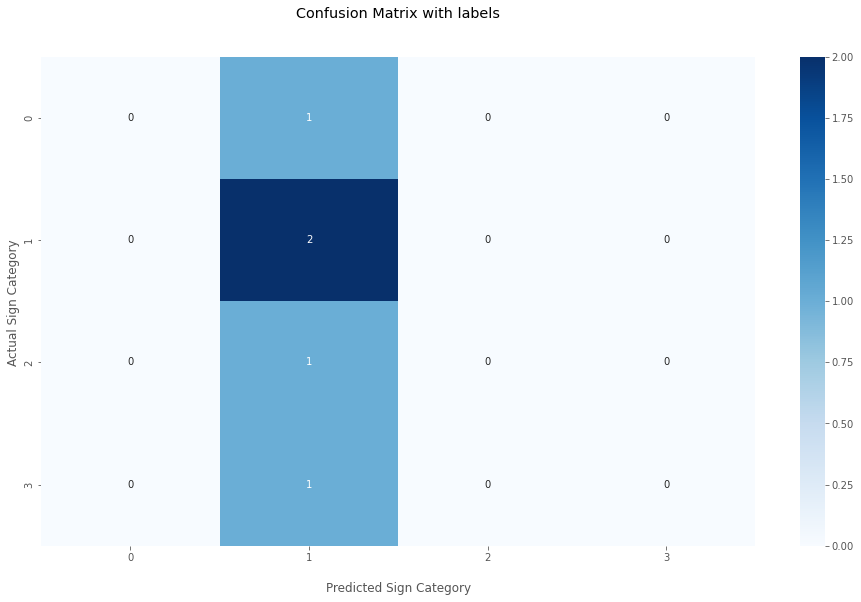

In [223]:
n_neighbors_PC6_10_10inst_verbs = 3
 
knn_PC6_10_10inst_verbs = KNeighborsClassifier(n_neighbors_PC6_10_10inst_verbs)
knn_PC6_10_10inst_verbs.fit(X_train_PC6_10_10inst_verbs, y_train_PC6_10_10inst_verbs)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_PC6_10_10inst_verbs.score(X_train_PC6_10_10inst_verbs, y_train_PC6_10_10inst_verbs)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_PC6_10_10inst_verbs.score(X_test_PC6_10_10inst_verbs, y_test_PC6_10_10inst_verbs)))

pred_PC6_10_10inst_verbs = knn_PC6_10_10inst_verbs.predict(X_test_PC6_10_10inst_verbs)
cf_matrix_PC6_10_10inst_verbs = confusion_matrix(y_test_PC6_10_10inst_verbs, pred_PC6_10_10inst_verbs)

import seaborn as sns
import matplotlib.pyplot as plt

ax_PC6_10_10inst_verbs = sns.heatmap(cf_matrix_PC6_10_10inst_verbs, annot=True, cmap='Blues')

ax_PC6_10_10inst_verbs.set_title('Confusion Matrix with labels\n\n');
ax_PC6_10_10inst_verbs.set_xlabel('\nPredicted Sign Category');
ax_PC6_10_10inst_verbs.set_ylabel('Actual Sign Category ');

## Display the visualization of the Confusion Matrix.
plt.show()

# With k = 5

Accuracy of K-NN classifier on training set: 0.57
Accuracy of K-NN classifier on test set: 0.40


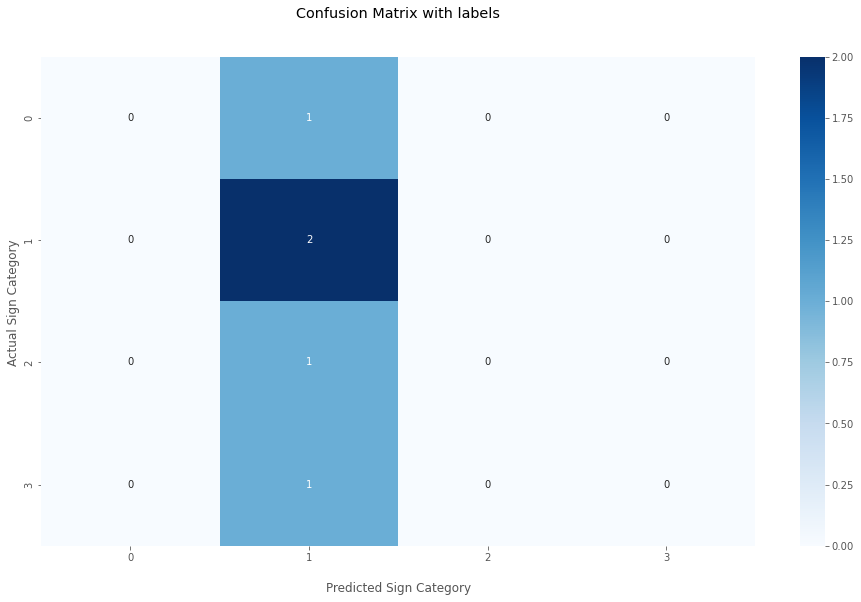

In [224]:
n_neighbors_PC6_10_10inst_verbs = 5
 
knn_PC6_10_10inst_verbs = KNeighborsClassifier(n_neighbors_PC6_10_10inst_verbs)
knn_PC6_10_10inst_verbs.fit(X_train_PC6_10_10inst_verbs, y_train_PC6_10_10inst_verbs)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_PC6_10_10inst_verbs.score(X_train_PC6_10_10inst_verbs, y_train_PC6_10_10inst_verbs)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_PC6_10_10inst_verbs.score(X_test_PC6_10_10inst_verbs, y_test_PC6_10_10inst_verbs)))

pred_PC6_10_10inst_verbs = knn_PC6_10_10inst_verbs.predict(X_test_PC6_10_10inst_verbs)
cf_matrix_PC6_10_10inst_verbs = confusion_matrix(y_test_PC6_10_10inst_verbs, pred_PC6_10_10inst_verbs)

import seaborn as sns
import matplotlib.pyplot as plt

ax_PC6_10_10inst_verbs = sns.heatmap(cf_matrix_PC6_10_10inst_verbs, annot=True, cmap='Blues')

ax_PC6_10_10inst_verbs.set_title('Confusion Matrix with labels\n\n');
ax_PC6_10_10inst_verbs.set_xlabel('\nPredicted Sign Category');
ax_PC6_10_10inst_verbs.set_ylabel('Actual Sign Category ');

## Display the visualization of the Confusion Matrix.
plt.show()

In [225]:
PCA_6components_verbs = PC1_df_verbs.append(PC2_df_verbs).append(PC3_df_verbs).append(PC4_df_verbs).append(PC5_df_verbs).append(PC6_df_verbs)

dic = {}
for i in range(60):
    x = list(PCA_6components_verbs.iloc[i,:])
    if x[0] not in dic:
        dic[x[0]] = 1
    else:
        dic[x[0]] +=1
dic

C:\Users\BRENDA\AppData\Local\Temp\ipykernel_3132\2693031964.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  PCA_6components_verbs = PC1_df_verbs.append(PC2_df_verbs).append(PC3_df_verbs).append(PC4_df_verbs).append(PC5_df_verbs).append(PC6_df_verbs)
C:\Users\BRENDA\AppData\Local\Temp\ipykernel_3132\2693031964.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  PCA_6components_verbs = PC1_df_verbs.append(PC2_df_verbs).append(PC3_df_verbs).append(PC4_df_verbs).append(PC5_df_verbs).append(PC6_df_verbs)
C:\Users\BRENDA\AppData\Local\Temp\ipykernel_3132\2693031964.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  PCA_6components_verbs = PC1_df_verbs.append(PC2_df_verbs).append(PC3_df_verbs).append(PC4_df_verbs).append(PC5

{'feature_125': 1,
 'feature_126': 1,
 'feature_122': 1,
 'feature_121': 1,
 'feature_127': 1,
 'feature_123': 1,
 'feature_118': 1,
 'feature_117': 1,
 'feature_128': 1,
 'feature_572': 1,
 'feature_780': 1,
 'feature_782': 1,
 'feature_778': 1,
 'feature_775': 1,
 'feature_781': 1,
 'feature_777': 1,
 'feature_762': 1,
 'feature_779': 1,
 'feature_837': 1,
 'feature_776': 1,
 'feature_2': 1,
 'feature_1': 1,
 'feature_3': 1,
 'feature_58': 1,
 'feature_57': 1,
 'feature_56': 1,
 'feature_55': 1,
 'feature_130': 1,
 'feature_131': 1,
 'feature_766': 1,
 'feature_481': 1,
 'feature_556': 1,
 'feature_406': 1,
 'feature_331': 1,
 'feature_552': 1,
 'feature_631': 1,
 'feature_477': 1,
 'feature_105': 1,
 'feature_29': 1,
 'feature_554': 1,
 'feature_956': 1,
 'feature_955': 1,
 'feature_220': 1,
 'feature_224': 1,
 'feature_223': 1,
 'feature_219': 1,
 'feature_957': 1,
 'feature_204': 1,
 'feature_216': 1,
 'feature_959': 1,
 'feature_953': 1,
 'feature_952': 1,
 'feature_949': 1,
 'fe

In [226]:
##############################
  #HOW TO CALCULATE WITH PCA ( 10 components )
#############################

projection_verbs = pca_verbs.transform(X=new_verbs_dataset_10_10inst)
projection_verbs = pd.DataFrame(
    projection_verbs,
    columns =[ 'PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19'
    ],
    index   = new_verbs_dataset_10_10inst.index
)
projection_verbs.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19
0,8.105615,-13.864074,-6.620327,-2.188155,4.953573,-4.484361,1.547208,7.369802,4.355708,5.128882,-3.105767,3.257483,8.747035,-2.322022,0.180291,1.352953,-1.001459,0.538314,-0.584435
1,4.934860,-14.909857,-5.098570,-3.113846,6.015040,-4.614235,4.718439,8.612639,-0.072410,4.159064,-2.402282,1.422239,9.295031,-1.290554,0.630021,1.840244,-2.116529,-0.212359,-0.459429
2,9.284063,-9.246034,-5.254463,-1.312403,7.386057,-5.528174,1.184930,6.132783,1.556455,3.236905,-1.117181,2.492347,7.066543,-1.551664,-0.254137,1.250849,-1.618299,0.189776,-0.428939
3,7.081202,-7.657921,-3.512520,-3.470569,7.582096,-2.437118,4.986342,6.591800,2.605231,5.365146,-0.613305,2.718853,7.078491,-2.502040,-0.367666,0.188576,-2.146450,0.041213,-0.367943
6,5.801278,-16.103883,-0.360160,-1.520612,8.096032,-3.065472,2.006743,8.975428,3.897977,5.255246,-1.124529,2.854548,7.455615,-0.749871,0.833454,2.077262,-0.801926,0.784126,-0.321349


In [227]:
PC10_10_10inst_verbs = projection_verbs.iloc[:,0:10]
PC10_10_10inst_verbs.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,8.105615,-13.864074,-6.620327,-2.188155,4.953573,-4.484361,1.547208,7.369802,4.355708,5.128882
1,4.934860,-14.909857,-5.098570,-3.113846,6.015040,-4.614235,4.718439,8.612639,-0.072410,4.159064
2,9.284063,-9.246034,-5.254463,-1.312403,7.386057,-5.528174,1.184930,6.132783,1.556455,3.236905
3,7.081202,-7.657921,-3.512520,-3.470569,7.582096,-2.437118,4.986342,6.591800,2.605231,5.365146
6,5.801278,-16.103883,-0.360160,-1.520612,8.096032,-3.065472,2.006743,8.975428,3.897977,5.255246


In [228]:
PC10_10_10inst_verbs.insert(0,"instance",['aprender_18','aprender_27','aprender_35','aprender_7','comer_146','comer_164','comer_484','comer_489','comer_743',
 'comer_779','comer_86','decir_101',
 'decir_276','decir_528','decir_789','pensar_339','pensar_66','pensar_761',
 'pensar_771'],True)

In [229]:
PC10_10_10inst_verbs['classes'] = PC10_10_10inst_verbs['instance'].apply(lambda x: x.split('_')[0])

C:\Users\BRENDA\AppData\Local\Temp\ipykernel_3132\179752405.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PC10_10_10inst_verbs['classes'] = PC10_10_10inst_verbs['instance'].apply(lambda x: x.split('_')[0])


In [230]:
PC10_10_10inst_verbs.drop("instance", axis=1, inplace=True)

PC10_10_10inst_verbs.head()

C:\Users\BRENDA\AppData\Local\Temp\ipykernel_3132\1044353519.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PC10_10_10inst_verbs.drop("instance", axis=1, inplace=True)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,classes
0,8.105615,-13.864074,-6.620327,-2.188155,4.953573,-4.484361,1.547208,7.369802,4.355708,5.128882,aprender
1,4.934860,-14.909857,-5.098570,-3.113846,6.015040,-4.614235,4.718439,8.612639,-0.072410,4.159064,aprender
2,9.284063,-9.246034,-5.254463,-1.312403,7.386057,-5.528174,1.184930,6.132783,1.556455,3.236905,aprender
3,7.081202,-7.657921,-3.512520,-3.470569,7.582096,-2.437118,4.986342,6.591800,2.605231,5.365146,aprender
6,5.801278,-16.103883,-0.360160,-1.520612,8.096032,-3.065472,2.006743,8.975428,3.897977,5.255246,comer


In [231]:
print(pd.unique(PC10_10_10inst_verbs['classes']))

X_PC10_10_10inst_verbs= PC10_10_10inst_verbs.iloc[:,:-1].values
y_PC10_10_10inst_verbs=  PC10_10_10inst_verbs.iloc[:,-1].values

['aprender' 'comer' 'decir' 'pensar']


In [232]:
Labelencoder_Y = LabelEncoder()
y_PC10_10_10inst_verbs== Labelencoder_Y.fit_transform(y_PC10_10_10inst_verbs)
y_PC10_10_10inst_verbs

array(['aprender', 'aprender', 'aprender', 'aprender', 'comer', 'comer',
       'comer', 'comer', 'comer', 'comer', 'comer', 'decir', 'decir',
       'decir', 'decir', 'pensar', 'pensar', 'pensar', 'pensar'],
      dtype=object)

In [233]:
X_train_PC10_10_10inst_verbs, X_test_PC10_10_10inst_verbs, y_train_PC10_10_10inst_verbs, y_test_PC10_10_10inst_verbs = train_test_split(X_PC10_10_10inst_verbs, y_PC10_10_10inst_verbs, test_size = 0.25, random_state=0)
scaler = MinMaxScaler()
X_train_PC10_10_10inst_verbs = scaler.fit_transform(X_train_PC10_10_10inst_verbs)
X_test_PC10_10_10inst_verbs = scaler.transform(X_test_PC10_10_10inst_verbs)

([<matplotlib.axis.XTick at 0x26af2127b80>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

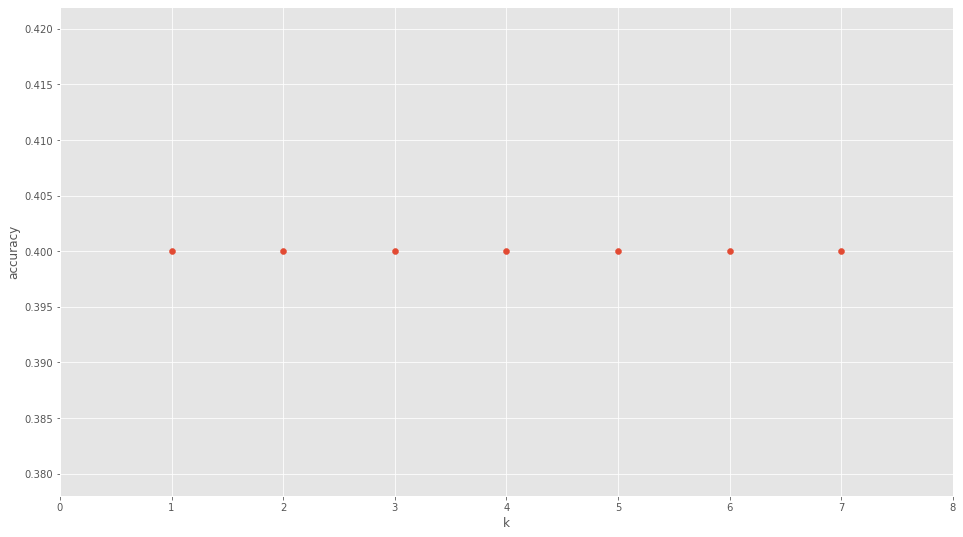

In [234]:
k_range_PC10_10_10inst_verbs = range(1, 8)
scores_PC10_10_10inst_verbs = []
for k in k_range_PC10_10_10inst_verbs:
    knn_PC10_10_10inst_verbs = KNeighborsClassifier(n_neighbors = k)
    knn_PC10_10_10inst_verbs.fit(X_train_PC10_10_10inst_verbs, y_train_PC10_10_10inst_verbs)
    scores_PC10_10_10inst_verbs.append(knn_PC10_10_10inst_verbs.score(X_test_PC10_10_10inst_verbs, y_test_PC10_10_10inst_verbs))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range_PC10_10_10inst_verbs, scores_PC10_10_10inst_verbs)
plt.xticks([0,1,2,3,4,5,6,7,8])

# With k = 1

Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 0.40


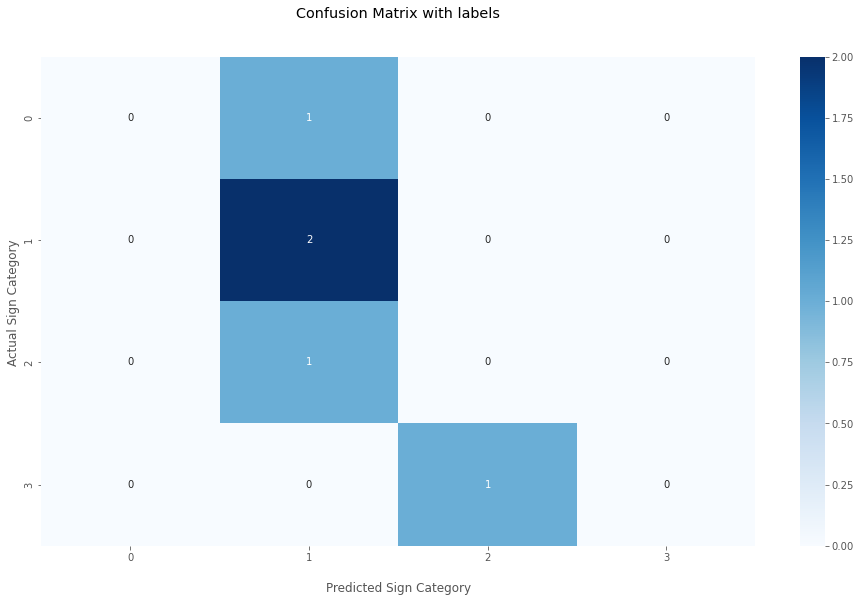

In [235]:
n_neighbors_PC10_10_10inst_verbs = 1
 
knn_PC10_10_10inst_verbs = KNeighborsClassifier(n_neighbors_PC10_10_10inst_verbs)
knn_PC10_10_10inst_verbs.fit(X_train_PC10_10_10inst_verbs, y_train_PC10_10_10inst_verbs)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_PC10_10_10inst_verbs.score(X_train_PC10_10_10inst_verbs, y_train_PC10_10_10inst_verbs)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_PC10_10_10inst_verbs.score(X_test_PC10_10_10inst_verbs, y_test_PC10_10_10inst_verbs)))

pred_PC10_10_10inst_verbs = knn_PC10_10_10inst_verbs.predict(X_test_PC10_10_10inst_verbs)
cf_matrix_PC10_10_10inst_verbs = confusion_matrix(y_test_PC10_10_10inst_verbs, pred_PC10_10_10inst_verbs)

import seaborn as sns
import matplotlib.pyplot as plt

ax_PC10_10_10inst_verbs = sns.heatmap(cf_matrix_PC10_10_10inst_verbs, annot=True, cmap='Blues')

ax_PC10_10_10inst_verbs.set_title('Confusion Matrix with labels\n\n');
ax_PC10_10_10inst_verbs.set_xlabel('\nPredicted Sign Category');
ax_PC10_10_10inst_verbs.set_ylabel('Actual Sign Category ');

## Display the visualization of the Confusion Matrix.
plt.show()

# With k = 2

Accuracy of K-NN classifier on training set: 0.64
Accuracy of K-NN classifier on test set: 0.40


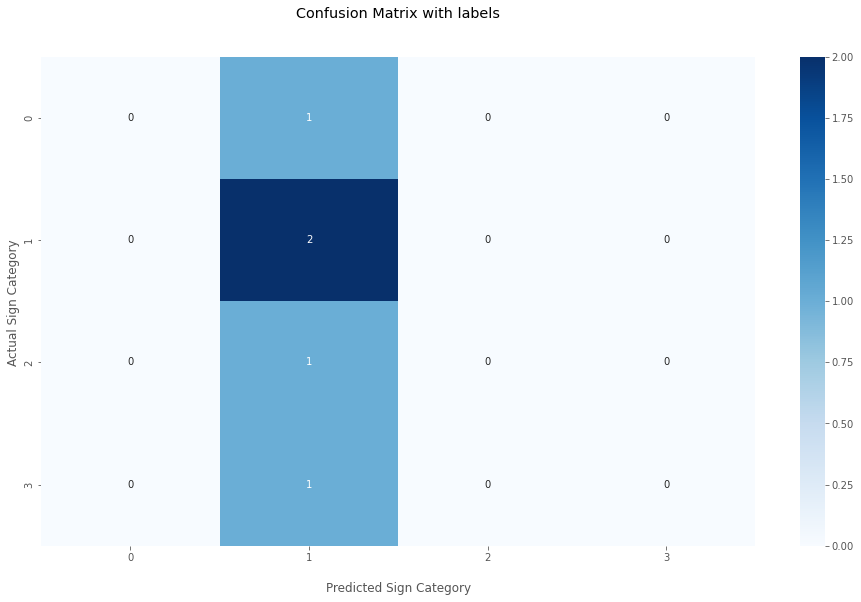

In [236]:
n_neighbors_PC10_10_10inst_verbs = 2
 
knn_PC10_10_10inst_verbs = KNeighborsClassifier(n_neighbors_PC10_10_10inst_verbs)
knn_PC10_10_10inst_verbs.fit(X_train_PC10_10_10inst_verbs, y_train_PC10_10_10inst_verbs)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_PC10_10_10inst_verbs.score(X_train_PC10_10_10inst_verbs, y_train_PC10_10_10inst_verbs)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_PC10_10_10inst_verbs.score(X_test_PC10_10_10inst_verbs, y_test_PC10_10_10inst_verbs)))

pred_PC10_10_10inst_verbs = knn_PC10_10_10inst_verbs.predict(X_test_PC10_10_10inst_verbs)
cf_matrix_PC10_10_10inst_verbs = confusion_matrix(y_test_PC10_10_10inst_verbs, pred_PC10_10_10inst_verbs)

import seaborn as sns
import matplotlib.pyplot as plt

ax_PC10_10_10inst_verbs = sns.heatmap(cf_matrix_PC10_10_10inst_verbs, annot=True, cmap='Blues')

ax_PC10_10_10inst_verbs.set_title('Confusion Matrix with labels\n\n');
ax_PC10_10_10inst_verbs.set_xlabel('\nPredicted Sign Category');
ax_PC10_10_10inst_verbs.set_ylabel('Actual Sign Category ');

## Display the visualization of the Confusion Matrix.
plt.show()

# With k = 3

Accuracy of K-NN classifier on training set: 0.64
Accuracy of K-NN classifier on test set: 0.40


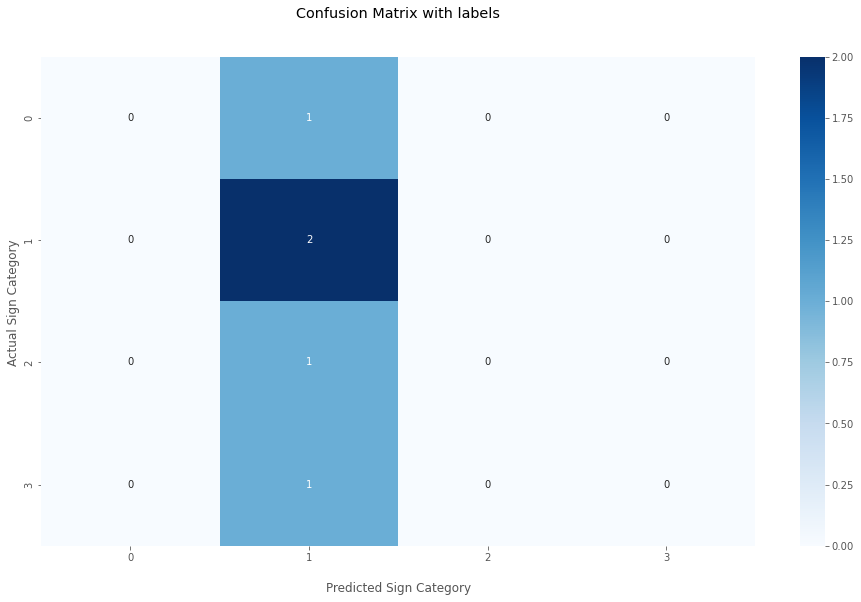

In [237]:
n_neighbors_PC10_10_10inst_verbs = 3
 
knn_PC10_10_10inst_verbs = KNeighborsClassifier(n_neighbors_PC10_10_10inst_verbs)
knn_PC10_10_10inst_verbs.fit(X_train_PC10_10_10inst_verbs, y_train_PC10_10_10inst_verbs)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_PC10_10_10inst_verbs.score(X_train_PC10_10_10inst_verbs, y_train_PC10_10_10inst_verbs)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_PC10_10_10inst_verbs.score(X_test_PC10_10_10inst_verbs, y_test_PC10_10_10inst_verbs)))

pred_PC10_10_10inst_verbs = knn_PC10_10_10inst_verbs.predict(X_test_PC10_10_10inst_verbs)
cf_matrix_PC10_10_10inst_verbs = confusion_matrix(y_test_PC10_10_10inst_verbs, pred_PC10_10_10inst_verbs)

import seaborn as sns
import matplotlib.pyplot as plt

ax_PC10_10_10inst_verbs = sns.heatmap(cf_matrix_PC10_10_10inst_verbs, annot=True, cmap='Blues')

ax_PC10_10_10inst_verbs.set_title('Confusion Matrix with labels\n\n');
ax_PC10_10_10inst_verbs.set_xlabel('\nPredicted Sign Category');
ax_PC10_10_10inst_verbs.set_ylabel('Actual Sign Category ');

## Display the visualization of the Confusion Matrix.
plt.show()

# With k = 5

Accuracy of K-NN classifier on training set: 0.50
Accuracy of K-NN classifier on test set: 0.40


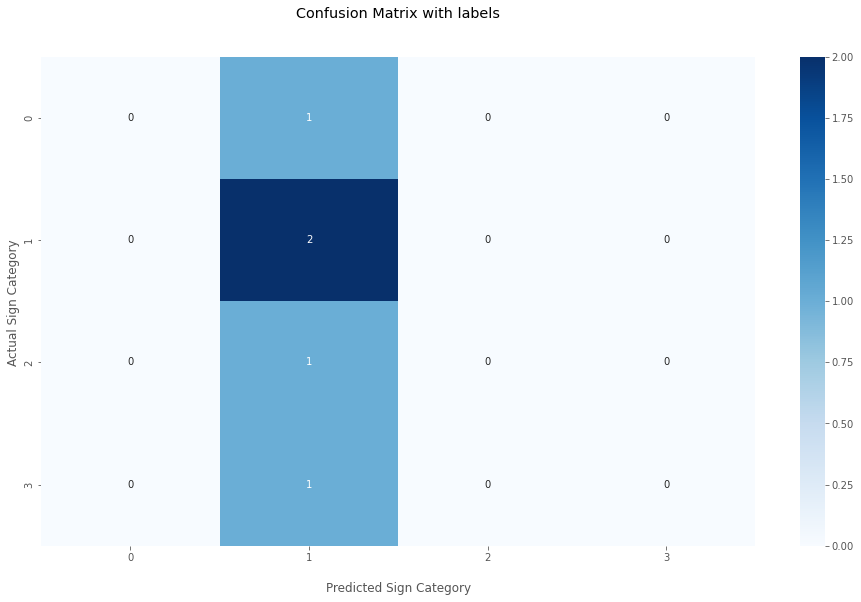

In [238]:
n_neighbors_PC10_10_10inst_verbs = 5
 
knn_PC10_10_10inst_verbs = KNeighborsClassifier(n_neighbors_PC10_10_10inst_verbs)
knn_PC10_10_10inst_verbs.fit(X_train_PC10_10_10inst_verbs, y_train_PC10_10_10inst_verbs)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_PC10_10_10inst_verbs.score(X_train_PC10_10_10inst_verbs, y_train_PC10_10_10inst_verbs)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_PC10_10_10inst_verbs.score(X_test_PC10_10_10inst_verbs, y_test_PC10_10_10inst_verbs)))

pred_PC10_10_10inst_verbs = knn_PC10_10_10inst_verbs.predict(X_test_PC10_10_10inst_verbs)
cf_matrix_PC10_10_10inst_verbs = confusion_matrix(y_test_PC10_10_10inst_verbs, pred_PC10_10_10inst_verbs)

import seaborn as sns
import matplotlib.pyplot as plt

ax_PC10_10_10inst_verbs = sns.heatmap(cf_matrix_PC10_10_10inst_verbs, annot=True, cmap='Blues')

ax_PC10_10_10inst_verbs.set_title('Confusion Matrix with labels\n\n');
ax_PC10_10_10inst_verbs.set_xlabel('\nPredicted Sign Category');
ax_PC10_10_10inst_verbs.set_ylabel('Actual Sign Category ');

## Display the visualization of the Confusion Matrix.
plt.show()